## 산점도 행렬

pandas.plotting에서는 산점도와 함께 각 변수의 밀도그래프(KDE,Histogram)을 함계 그려 데이터의 분포와 변수들간의 관계를 함께 살펴볼 수 있도록 하였다.

**(1) 산점도 행렬 해석 방법**
1. `대각선의 히스토그램`을 통해 `이상치`를 확인한다.
2. 종속변수와 설명변수들 간의 관계를 시각적으로 판단한다.
3. `종속변수가 수치형`인 경우 각 설명변수와의 직선 상관관계를 비교한다.
4. `종속변수가 범주형`인 경우 각 종속변수를 잘 구분하는 변수를 파악한다.
5. 설명변수 간의 직선 함수관계를 파악하여 `다중공선성 문제`를 진단한다.

**(2) 산점도 행렬 그리는 법**
`scatter_matrix(data, alpha=0.5, figsize=(8,8), diagonal='hist')`
- data: 데이터 프레임
- alpha: 투명도 (0~1)
- figsize: 그래프 크기(x, y)
- diagonal: 대각선 밀도 그래프 종류 (hist/kde)

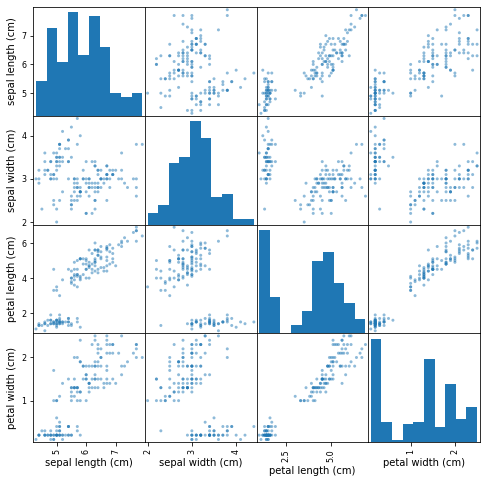

In [5]:
# 데이터 가져오기
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'})

# 산점도 행렬
scatter_matrix(iris, alpha=0.5, figsize=(8,8), diagonal='hist')
plt.show()

`sns.pairplot(data, diag_kind='auto', hue='target 컬럼명')`
- data: 데이터 프레임
- diag_kind: 대각선 밀도 그래프 종류(auto, hist, kde)
- hue: 색을 구분할 타깃 변수

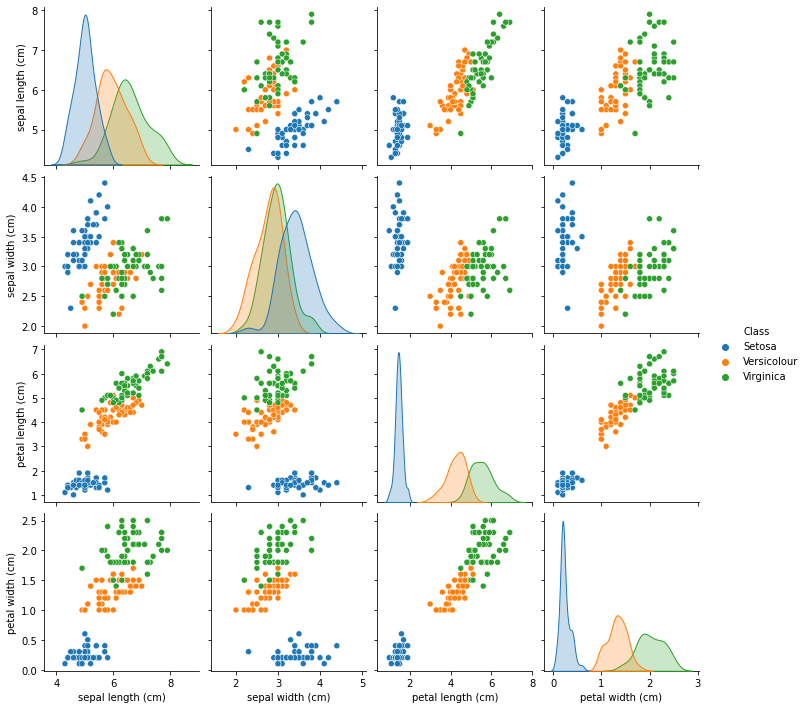

In [6]:
import seaborn as sns
sns.pairplot(iris, diag_kind='auto', hue='Class')
plt.show()

**KDE 그래프**

KDE(Kernel Density Estimator, 커널 밀도 추정)는 히스토그램과 함꼐 `Non-parametic 밀도 추정 방법` 중 하나이다. `bin의 크기와 시작 및 종료 위치에 따라서 그래프가 달라지는 히스토그램의 문제점을 개선`한 방법으로, 커널 함수를 사용하여 데이터의 분포를 smooth하게 나타낸 것.

## 상관계수 행렬 그래프

**(1) 상관관계 해석하기**